In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Importing Dataset

In [3]:
data = pd.read_csv("churn_prediction_simple.csv")
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [6]:
#checking the dataset distribution
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [8]:
# separating independent and dependent variables
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [15]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [17]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building Predictions and Odds Ratio

In [18]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [19]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_test) # predicting classes
predicted_probabilities = classifier.predict_proba(x_test) #predicting probabilities

In [21]:
predicted_values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
predicted_probabilities

array([[0.58695843, 0.41304157],
       [0.57571482, 0.42428518],
       [0.61536338, 0.38463662],
       ...,
       [0.7666153 , 0.2333847 ],
       [0.60980127, 0.39019873],
       [0.58382165, 0.41617835]])

Evaluation Metrics

In [24]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted_values)
cf

array([[2603,  956],
       [ 316,  539]], dtype=int64)

In [25]:
#Accuracy
classifier.score(x_test,y_test)

0.7118260081558677

In [26]:
# calculating precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test,predicted_values)
Precision

0.3605351170568562

In [27]:
#calculating recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test,predicted_values)
Recall

0.6304093567251462

In [28]:
# manually calculating the f1 score
f1 = 2/((1/Precision)+(1/Recall))
f1

0.4587234042553192

In [29]:
#calculating the f1 score
from sklearn.metrics import f1_score
F1 = f1_score(y_test,predicted_values)
F1

0.4587234042553192

In [30]:
#calculating the precision, recall, f1score, support at once
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test,predicted_values)

In [31]:
precision

array([0.89174375, 0.36053512])

In [32]:
recall

array([0.73138522, 0.63040936])

In [33]:
f1

array([0.8036431, 0.4587234])

In [35]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3559
           1       0.36      0.63      0.46       855

    accuracy                           0.71      4414
   macro avg       0.63      0.68      0.63      4414
weighted avg       0.79      0.71      0.74      4414



# Precision-Recall curve

In [36]:
#gathering Precision/Recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4409,), (4409,), (4408,))

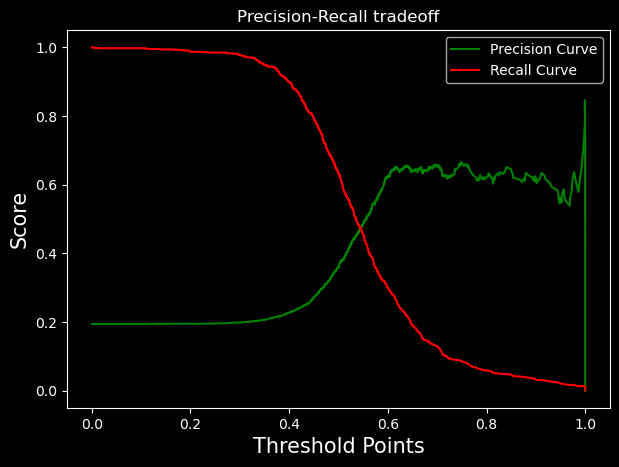

In [40]:
plt.figure(figsize = (7,5), dpi=100)
plt.plot(threshold_points,precision_points[:-1], color ='green', label = 'Precision Curve')
plt.plot(threshold_points, recall_points[:-1], color = 'red', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff')
plt.legend()

# AUC - ROC curve

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test,predicted_probabilities[:,1])

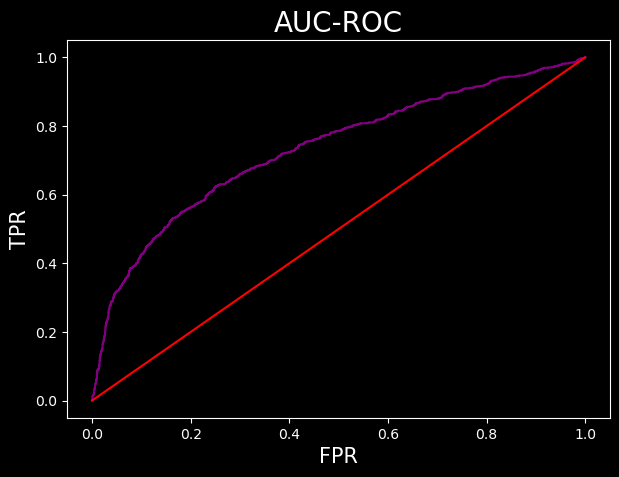

0.7333379341394601

In [45]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(fpr,tpr, color = 'purple')
plt.plot([0,1],[0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# Coefficient Plot

In [46]:
#arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns
coeff_plot = pd.DataFrame({'coefficients' : c,
                          'variable':x})
#sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-1.919101,current_balance
13,-0.424104,current_month_credit
10,-0.224776,previous_month_end_balance
0,-0.150576,vintage
8,-0.142676,days_since_last_transaction


Text(0.5, 1.0, 'Coefficient plot')

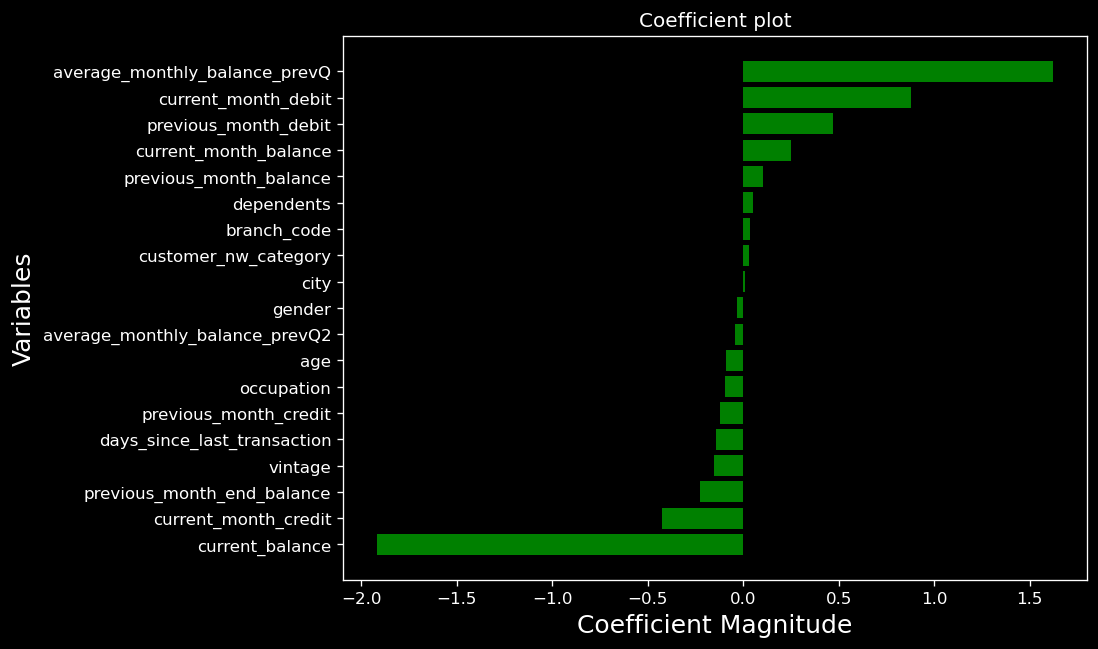

In [50]:
plt.figure(figsize = (8,6), dpi=120)
plt.barh(coeff_plot['variable'], coeff_plot['coefficients'], color = 'green')
plt.xlabel('Coefficient Magnitude', fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot')